In [1]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd
import timesync_utils as tutils
from tabulate import tabulate

In [2]:
csv_f_name = "../../data/train_data/martin_train_3_030221.csv"
annot_f_name = "../../data/annotation/training/martin_train_3_030221.txt"


POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

In [3]:
knn_train = df_wrapper(csv_f_name)
knn_train.concat_sensor_data(3)
knn_train.df

[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

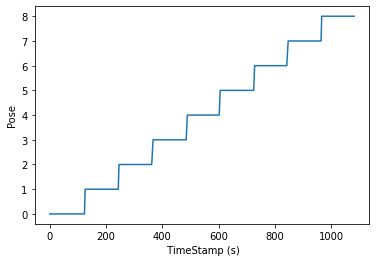

In [4]:
stamped_poses = get_timestamp_and_pose(annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train.df.index)))
knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
# print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train.df['SensorId'])

In [5]:
csv_file = "../../data/test_data/martin_test_3_040221.csv"
annot_file = "../../data/annotation/testing/martin_test_3_040221.txt"

knn_test = df_wrapper(csv_file)
knn_test.concat_sensor_data(3)
knn_test.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  4602
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.015310,-0.788833,-0.614601,-0.289234,0.148599,-0.033029,-9.839348,-28.458256,-28.027618,...,-1.071338,-17.708399,-38.867931,37.483280,10.758442,-132.375031,-0.353097,0.210372,-0.256812,-0.874708
1,0.02,0.016988,-0.793990,-0.618397,-1.066031,2.228461,0.906500,-9.603559,-26.743862,-28.329145,...,-0.721022,-18.281912,-38.748581,37.483467,10.769194,-132.347015,-0.353279,0.210515,-0.256723,-0.874626
2,0.04,0.016548,-0.778584,-0.619201,0.402291,2.340249,1.330297,-9.397241,-27.924265,-27.364267,...,-1.100532,-18.167210,-39.136456,37.473198,10.791303,-132.299423,-0.353598,0.210754,-0.256479,-0.874511
3,0.06,0.016636,-0.779548,-0.616585,-1.681398,2.340109,0.459941,-9.721454,-27.109226,-28.057776,...,-0.983759,-17.966480,-39.136456,37.457188,10.839692,-132.248672,-0.353876,0.211177,-0.256090,-0.874411
4,0.08,0.018946,-0.789322,-0.622949,-1.797317,1.478723,0.090666,-9.691978,-28.036684,-27.937162,...,-1.042145,-17.966480,-38.957439,37.465382,10.898922,-132.218246,-0.353923,0.211709,-0.255885,-0.874323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,91.94,0.120100,-0.493723,-0.858217,10.623210,19.655279,-8.492423,-6.715131,-18.846420,-36.168831,...,5.964177,-9.851303,-42.478168,25.890158,21.628696,-126.950310,-0.389899,0.261877,-0.115215,-0.875285
4598,91.96,0.126508,-0.493604,-0.839787,11.495259,19.904470,-9.395234,-6.449863,-18.509165,-35.987907,...,6.694001,-11.055676,-43.104736,26.183422,21.653545,-126.894440,-0.389593,0.263113,-0.117226,-0.874784
4599,91.98,0.141890,-0.512598,-0.846178,9.437231,16.525085,-8.950869,-6.066706,-18.565372,-36.379890,...,6.372879,-11.715213,-43.134571,26.445723,21.708185,-126.830879,-0.389340,0.264469,-0.118859,-0.874267
4600,92.00,0.148199,-0.524692,-0.842576,10.974522,20.330591,-6.262592,-5.830916,-18.256224,-36.319592,...,6.372879,-10.711570,-42.716862,26.744068,21.763510,-126.739693,-0.389208,0.265981,-0.120698,-0.873615


[[0.0, 10.2, 0], [11.32, 19.96, 1], [20.64, 29.88, 2], [31.12, 40.64, 3], [41.96, 49.96, 4], [51.12, 60.0, 5], [61.32, 70.36, 6], [72.08, 80.28, 7], [81.32, 90.2, 8]]
drops: 563
length of knn_train.df after drops: 4039
4039


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

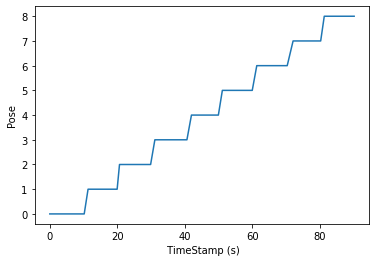

In [6]:
s_poses = get_timestamp_and_pose(annot_file, POSE_MAP)

print(s_poses)
knn_test.align_poses(s_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

In [7]:
#print(knn_train.df)
x_train = knn_train.df.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 

x_train_numpy = x_train.values
x_test_numpy = x_test.values

print(x_test_numpy.shape)
print(x_train_numpy.shape)

(4039, 48)
(52824, 48)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_numpy)
x_train_numpy = scaler.transform(x_train_numpy)
x_test_numpy = scaler.transform(x_test_numpy)
y_train_numpy = y_train.values
y_train_numpy.shape

(52824,)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=x_train_numpy, y=y_train_numpy, epochs=10)

Epoch 1/10
1651/1651 [==============================] - 2s 957us/step - loss: 0.4855 - accuracy: 0.8777
Epoch 2/10
1651/1651 [==============================] - 2s 958us/step - loss: 8.5164e-04 - accuracy: 1.0000
Epoch 3/10
1651/1651 [==============================] - 2s 961us/step - loss: 1.7357e-04 - accuracy: 1.0000
Epoch 4/10
1651/1651 [==============================] - 2s 971us/step - loss: 5.9576e-05 - accuracy: 1.0000
Epoch 5/10
1651/1651 [==============================] - 2s 965us/step - loss: 2.2001e-05 - accuracy: 1.0000
Epoch 6/10
1651/1651 [==============================] - 2s 959us/step - loss: 7.8095e-06 - accuracy: 1.0000
Epoch 7/10
1651/1651 [==============================] - 2s 982us/step - loss: 3.4344e-06 - accuracy: 1.0000
Epoch 8/10
1651/1651 [==============================] - 2s 959us/step - loss: 1.2732e-06 - accuracy: 1.0000
Epoch 9/10
1651/1651 [==============================] - 2s 971us/step - loss: 7.5233e-07 - accuracy: 1.0000
Epoch 10/10
1651/1651 [=========

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>